In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def simulation_a():
    coins = np.random.binomial(10, 0.5, 1000)
    c_first = coins
    nu_first = coins/10
    c_random = coins[random.randint(0,999)]
    nu_random = c_random/10
    c_min = min(coins)
    nu_min = c_min/10
    return nu_first,nu_min, nu_random
nu_first,nu_min, nu_random = simulation_a()
mu_first = np.mean(nu_first)
mu_min = np.mean(nu_min)
mu_random = np.mean( nu_random)

In [3]:
def simulation_b():
    nu_first =  np.empty((100000, 1))
    c_first = np.empty((100000, 1))
    nu_random = np.empty((100000, 1))
    c_random = np.empty((100000, 1))
    nu_min = np.empty((100000, 1))
    c_min = np.empty((100000, 1))
    
    for i in range(100000):
        coins = np.random.binomial(10, 0.5, 1000)
        c_first[i] = coins[0]
        nu_first[i] = coins[0]/10
        c_random[i] = coins[random.randint(0,999)]
        nu_random[i] = c_random[i]/10
        c_min[i] = min(coins)
        nu_min[i] = c_min[i]/10
    return nu_first,nu_min, nu_random

In [4]:
def probability(nu, epsilon):
    return np.where(abs(nu - 0.5)>epsilon)[0].size/nu.size

In [5]:
def hoeffding(epsilon, N):
    return 2 * np.exp(-2 * (epsilon ** 2) * N)

In [6]:
nu_first,nu_min, nu_random = simulation_b()
mu_first = np.mean(nu_first)
mu_min = np.mean(nu_min)
mu_random = np.mean( nu_random)

In [7]:
print(mu_first)
print(mu_min)
print(mu_random)

0.5008469999999999
0.037516999999999995
0.49982600000000005


Text(0, 0.5, 'Frequency')

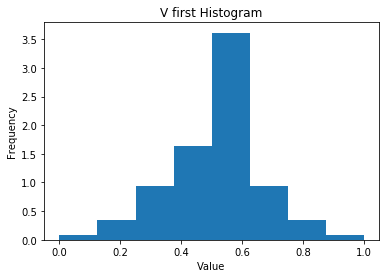

In [8]:
plt.hist(nu_first,8,density=True)
plt.title("V first Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

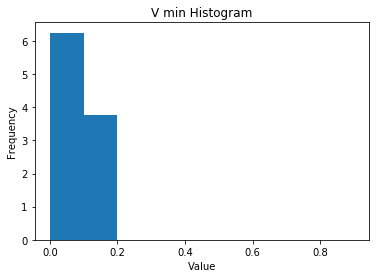

In [9]:
plt.hist(nu_min,np.arange(0, 1.0, 0.1),10, density=True)
plt.title("V min Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

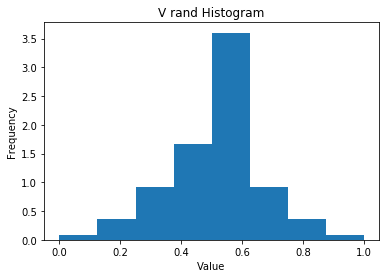

In [10]:
plt.hist(nu_random,8, density=True)
plt.title("V rand Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [11]:
epsilons = np.arange(0.01, 1, 0.01) 
P_first = [probability(nu_first, epsilon) for epsilon in epsilons] 
P_random = [probability(nu_random, epsilon) for epsilon in epsilons] 
P_min = [probability(nu_min, epsilon) for epsilon in epsilons] 
P_hoeffding = [hoeffding(epsilon, 10) for epsilon in epsilons]

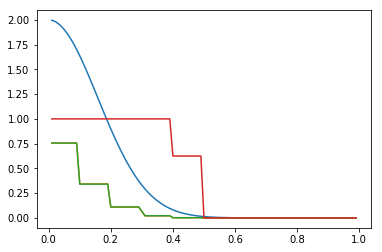

In [12]:
plt.plot(epsilons,P_hoeffding, label="Hoeffding") 
plt.plot(epsilons,P_first, label="First") 
plt.plot(epsilons,P_random, label="Random") 
plt.plot(epsilons,P_min, label="Min") 